# Mental Health and Technology Usage Analysis




In [ ]:
'''
Project set up
Import libraries and dependencies
Data Loading
'''
import pandas as pd



In [ ]:
import pandas as pd

# Correct file path
#file_path = '/content/sample_data/mental_health_and_technology_usage_2024.csv'

file_path = '/content/sample_data/mental_health_and_technology_usage_2024.csv'
df = pd.read_csv(file_path)
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [ ]:
# Ver rangos y clases de variables
def variable_ranges(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            print(f"{column} (Numeric): Range = {df[column].min()} to {df[column].max()}")
        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
            print(f"{column} (Categorical): Classes = {df[column].unique()}")
        else:
            print(f"{column} (Other type): Type = {df[column].dtype}")

# Ejecutar la función en el DataFrame cargado
variable_ranges(df)


User_ID (Categorical): Classes = ['USER-00001' 'USER-00002' 'USER-00003' ... 'USER-09998' 'USER-09999'
 'USER-10000']
Age (Numeric): Range = 18 to 65
Gender (Categorical): Classes = ['Female' 'Male' 'Other']
Technology_Usage_Hours (Numeric): Range = 1.0 to 12.0
Social_Media_Usage_Hours (Numeric): Range = 0.0 to 8.0
Gaming_Hours (Numeric): Range = 0.0 to 5.0
Screen_Time_Hours (Numeric): Range = 1.0 to 15.0
Mental_Health_Status (Categorical): Classes = ['Good' 'Poor' 'Fair' 'Excellent']
Stress_Level (Categorical): Classes = ['Low' 'High' 'Medium']
Sleep_Hours (Numeric): Range = 4.0 to 9.0
Physical_Activity_Hours (Numeric): Range = 0.0 to 10.0
Support_Systems_Access (Categorical): Classes = ['No' 'Yes']
Work_Environment_Impact (Categorical): Classes = ['Negative' 'Positive' 'Neutral']
Online_Support_Usage (Categorical): Classes = ['Yes' 'No']


<ipython-input-4-9bb954af0048>:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


*A CONTINUACIÓ CREO LAS MATRICES DE COVARIANZA Y DE CORRELACION PARA ANALIZAR LAS VARIABLES DE NUESTRO DATASET*

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
print(df[['Screen_Time_Hours', 'Stress_Level']].dtypes)

Screen_Time_Hours    float64
Stress_Level          object
dtype: object


## Covariance Matrix


In [ ]:
import pandas as pd

# Updated categories for age
# Define the bins and labels
bins = [0, 18, 25, 36, 50, 60, 65, 100]  # Adjusted based on new age ranges
labels = ['Under 18', '18-25', '26-35', '36-50', '51-60', '61-65', '65+']

# Apply binning
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Check the result
print(df[['Age', 'Age_Category']].head())

   Age Age_Category
0   23        18-25
1   21        18-25
2   51        51-60
3   25        18-25
4   53        51-60


In [ ]:
import pandas as pd



# Seleccionar solo las columnas relevantes (omite User_ID u otras variables de alta cardinalidad)
selected_columns = ['Age','Age_Category', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
                    'Gaming_Hours', 'Screen_Time_Hours', 'Mental_Health_Status',
                    'Stress_Level', 'Sleep_Hours', 'Physical_Activity_Hours',
                    'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage']

df_selected = df[selected_columns]

In [ ]:
# Define ordinal mappings
ordinal_mapping = {
    'Stress_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Mental_Health_Status': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Work_Environment_Impact': {'Negative': -1, 'Neutral': 0, 'Positive': 1},
    'Age_Category': {'Under 18': 1, '18-25': 2, '26-35': 3, '36-50': 4, '51-60': 5, '61-65': 6, '65+': 7}
}

# Replace categorical values with ordinal values
df_selected.replace(ordinal_mapping, inplace=True)
df_selected['Age_Category'] = pd.to_numeric(df_selected['Age_Category'], errors='coerce')

# Convert boolean-like columns to numeric
df_selected['Support_Systems_Access'] = df_selected['Support_Systems_Access'].map({'Yes': 1, 'No': 0})
df_selected['Online_Support_Usage'] = df_selected['Online_Support_Usage'].map({'Yes': 1, 'No': 0})
# Verify encoding
print(df_selected.head())

   Age  Age_Category  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0   23             2                    6.57                      6.00   
1   21             2                    3.01                      2.57   
2   51             5                    3.04                      6.14   
3   25             2                    3.84                      4.48   
4   53             5                    1.20                      0.56   

   Gaming_Hours  Screen_Time_Hours  Mental_Health_Status  Stress_Level  \
0          0.68              12.36                     3             1   
1          3.74               7.61                     1             3   
2          1.26               3.16                     2             3   
3          2.59              13.08                     4             2   
4          0.29              12.63                     3             1   

   Sleep_Hours  Physical_Activity_Hours  Support_Systems_Access  \
0         8.01                     6.71    

<ipython-input-7-8cce7b52f21d>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selected.replace(ordinal_mapping, inplace=True)
<ipython-input-7-8cce7b52f21d>:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_selected.replace(ordinal_mapping, inplace=True)
<ipython-input-7-8cce7b52f21d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
df_selected.drop(columns=['Age'], inplace=True)

<ipython-input-9-ec6e4836fc56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns=['Age'], inplace=True)


In [ ]:
#Scaling hours variable since they have different ranges
from sklearn.preprocessing import StandardScaler

# List of columns to scale
hours_columns = [
    'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
    'Gaming_Hours', 'Screen_Time_Hours',
    'Sleep_Hours', 'Physical_Activity_Hours'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling only to the hours columns
df_selected[hours_columns] = scaler.fit_transform(df[hours_columns])

# Check the result
print(df_selected[hours_columns].head())

   Technology_Usage_Hours  Social_Media_Usage_Hours  Gaming_Hours  \
0                0.030187                  0.876421     -1.268838   
1               -1.093244                 -0.606123      0.846355   
2               -1.083777                  0.936933     -0.867919   
3               -0.831320                  0.219433      0.051430   
4               -1.664426                 -1.474902     -1.538422   

   Screen_Time_Hours  Sleep_Hours  Physical_Activity_Hours  
0           1.084561     1.040263                 0.587332  
1          -0.090482     0.537113                 0.301608  
2          -1.191312     1.060940                 1.654495  
3           1.262673    -0.607036                 0.095060  
4           1.151353    -0.655283                -0.345575  


<ipython-input-10-84d004de5a7a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[hours_columns] = scaler.fit_transform(df[hours_columns])


In [ ]:
# Interaction Features
df_selected['Screen_Stress_Interaction'] = df_selected['Screen_Time_Hours'] * df_selected['Stress_Level']
df_selected['Social_Physical_Interaction'] = df_selected['Social_Media_Usage_Hours'] * df_selected['Physical_Activity_Hours']
df_selected['Stress_Sleep_Interaction'] = df_selected['Stress_Level'] * df_selected['Sleep_Hours']
df_selected['Work_Stress_Interaction'] = df_selected['Work_Environment_Impact'] * df_selected['Stress_Level']
df_selected['Tech_Social_Interaction'] = df_selected['Technology_Usage_Hours'] * df_selected['Social_Media_Usage_Hours']
df_selected['Gaming_Stress_Interaction'] = df_selected['Gaming_Hours'] * df_selected['Stress_Level']
df_selected['Support_Online_Interaction'] = df_selected['Support_Systems_Access'] * df_selected['Online_Support_Usage']
df_selected['Age_Tech_Interaction'] = df_selected['Age_Category'] * df_selected['Technology_Usage_Hours']

# Verify that the new columns have been added
print(df_selected.head())

   Age_Category  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0             2                0.030187                  0.876421   
1             2               -1.093244                 -0.606123   
2             5               -1.083777                  0.936933   
3             2               -0.831320                  0.219433   
4             5               -1.664426                 -1.474902   

   Gaming_Hours  Screen_Time_Hours  Mental_Health_Status  Stress_Level  \
0     -1.268838           1.084561                     3             1   
1      0.846355          -0.090482                     1             3   
2     -0.867919          -1.191312                     2             3   
3      0.051430           1.262673                     4             2   
4     -1.538422           1.151353                     3             1   

   Sleep_Hours  Physical_Activity_Hours  Support_Systems_Access  \
0     1.040263                 0.587332                       0   
1     

<ipython-input-11-3a9b4b6b8e02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Screen_Stress_Interaction'] = df_selected['Screen_Time_Hours'] * df_selected['Stress_Level']
<ipython-input-11-3a9b4b6b8e02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Social_Physical_Interaction'] = df_selected['Social_Media_Usage_Hours'] * df_selected['Physical_Activity_Hours']


In [ ]:
interaction_columns = [
    'Screen_Stress_Interaction', 'Social_Physical_Interaction',
    'Stress_Sleep_Interaction', 'Work_Stress_Interaction',
    'Tech_Social_Interaction', 'Gaming_Stress_Interaction',
    'Support_Online_Interaction', 'Age_Tech_Interaction'
]
df_selected[interaction_columns] = scaler.fit_transform(df_selected[interaction_columns])

## Correlation Matrix

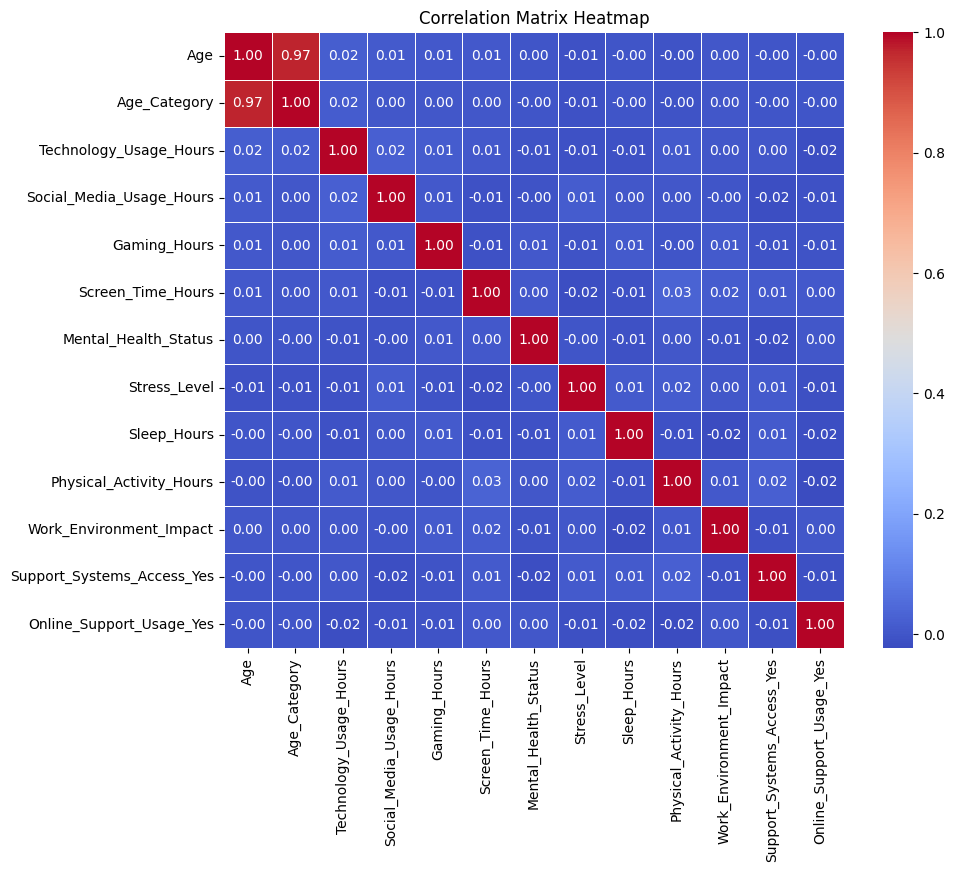

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your dataset)
# df = pd.read_csv('your_data.csv')

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Exploratory Data Analysis


In [ ]:
#Describe Data: Display basic stats, check data types.

#Basic statistics
print(df_encoded.describe())


                Age  Age_Category  Technology_Usage_Hours  \
count  10000.000000  10000.000000            1.000000e+04   
mean      41.518600      3.833600            3.197442e-17   
std       13.920217      1.273763            1.000050e+00   
min       18.000000      1.000000           -1.727541e+00   
25%       29.000000      3.000000           -8.565660e-01   
50%       42.000000      4.000000           -1.557056e-02   
75%       54.000000      5.000000            8.640822e-01   
max       65.000000      6.000000            1.743735e+00   

       Social_Media_Usage_Hours  Gaming_Hours  Screen_Time_Hours  \
count              1.000000e+04  1.000000e+04       1.000000e+04   
mean               4.263256e-18  1.550760e-16       2.245315e-16   
std                1.000050e+00  1.000050e+00       1.000050e+00   
min               -1.716950e+00 -1.738881e+00      -1.725647e+00   
25%               -8.611380e-01 -8.679192e-01      -8.548783e-01   
50%               -9.647773e-03  3.042837e

In [ ]:
#Data Types
print(df_encoded.dtypes)

Age                             int64
Age_Category                    int64
Technology_Usage_Hours        float64
Social_Media_Usage_Hours      float64
Gaming_Hours                  float64
Screen_Time_Hours             float64
Mental_Health_Status            int64
Stress_Level                    int64
Sleep_Hours                   float64
Physical_Activity_Hours       float64
Work_Environment_Impact         int64
Support_Systems_Access_Yes       bool
Online_Support_Usage_Yes         bool
dtype: object


In [ ]:
#Overview of the data
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10000 non-null  int64  
 1   Age_Category                10000 non-null  int64  
 2   Technology_Usage_Hours      10000 non-null  float64
 3   Social_Media_Usage_Hours    10000 non-null  float64
 4   Gaming_Hours                10000 non-null  float64
 5   Screen_Time_Hours           10000 non-null  float64
 6   Mental_Health_Status        10000 non-null  int64  
 7   Stress_Level                10000 non-null  int64  
 8   Sleep_Hours                 10000 non-null  float64
 9   Physical_Activity_Hours     10000 non-null  float64
 10  Work_Environment_Impact     10000 non-null  int64  
 11  Support_Systems_Access_Yes  10000 non-null  bool   
 12  Online_Support_Usage_Yes    10000 non-null  bool   
dtypes: bool(2), float64(6), int64(5)

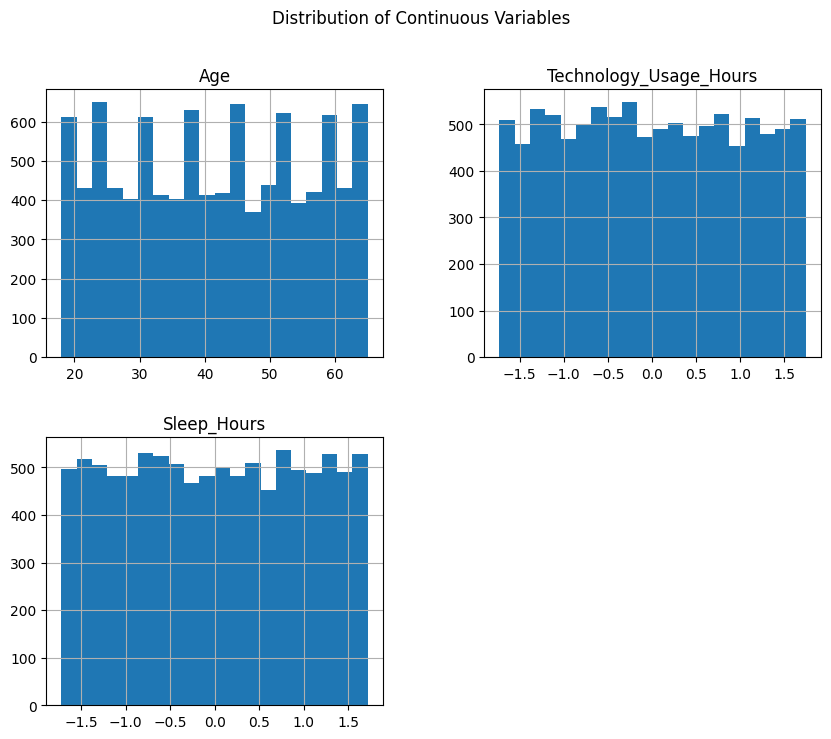

In [ ]:
#Visualize Key Variables: Plot scatter plots or histograms for initial patterns.
import matplotlib.pyplot as plt

df_encoded[['Age', 'Technology_Usage_Hours', 'Sleep_Hours']].hist(bins=20, figsize=(10, 8))
plt.suptitle("Distribution of Continuous Variables")
plt.show()


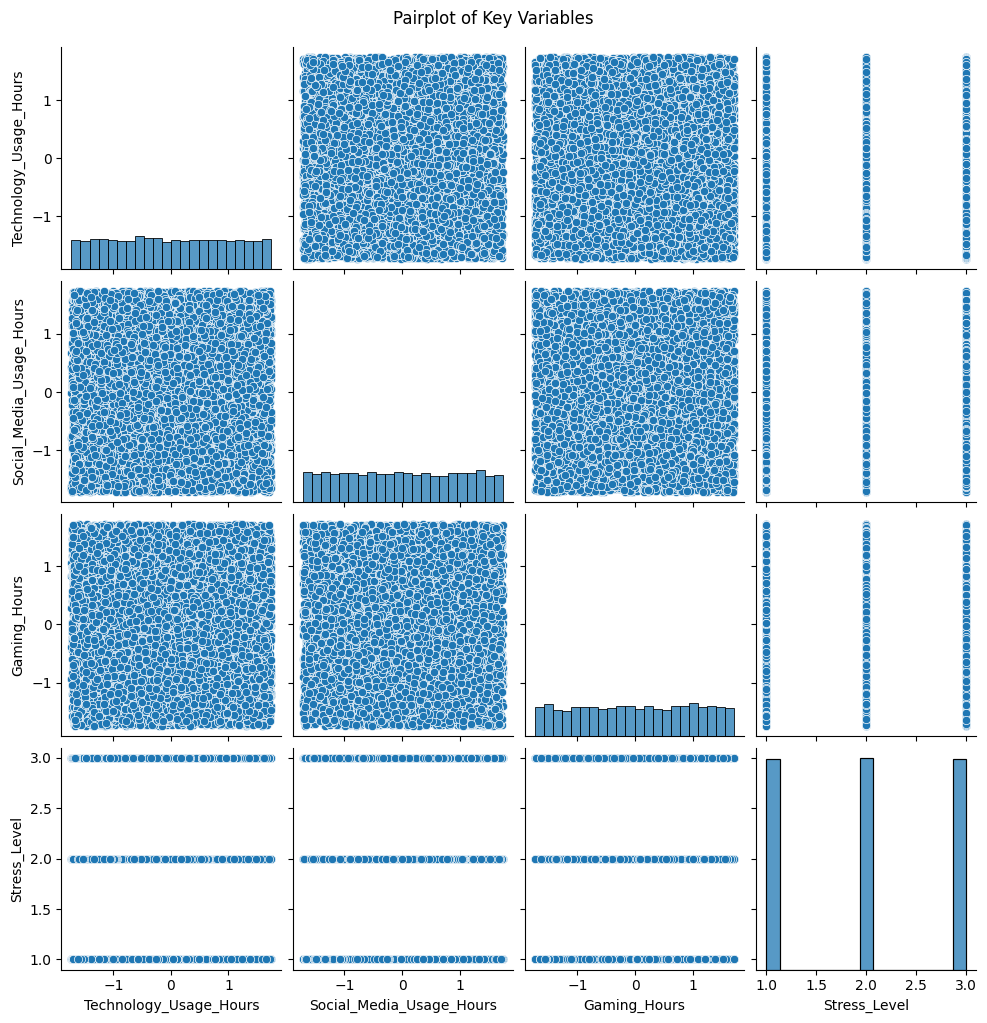

In [ ]:
sns.pairplot(df_encoded[['Technology_Usage_Hours', 'Social_Media_Usage_Hours',
                 'Gaming_Hours', 'Stress_Level']])
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

## Statistical Analysis

In [ ]:
'''
Hypothesis 1: Screen Time and Stress Level
ANOVA Test or Correlation Test to evaluate the relationship between screen time (Screen_Time_Hours) and stress level (Stress_Level).
'''

'\nHypothesis 1: Screen Time and Stress Level\nANOVA Test or Correlation Test to evaluate the relationship between screen time (Screen_Time_Hours) and stress level (Stress_Level).\n'

In [ ]:
## Relationship between Screen Time and Stress Levels


import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Asegurar que Stress_Level sea categórico y Screen_Time_Hours sea numérico
df['Stress_Level'] = df['Stress_Level'].astype('category')
df['Screen_Time_Hours'] = pd.to_numeric(df['Screen_Time_Hours'], errors='coerce')

# Calcular las medias de Screen_Time_Hours para cada nivel de Stress_Level
mean_values = df.groupby('Stress_Level')['Screen_Time_Hours'].mean()
print(mean_values)

# Configurar el modelo de ANOVA
model = ols('Screen_Time_Hours ~ C(Stress_Level)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrar resultados del ANOVA
print(anova_table)


Stress_Level
1    8.078079
2    7.931150
3    7.918111
Name: Screen_Time_Hours, dtype: float64
                        sum_sq      df         F    PR(>F)
C(Stress_Level)      52.593039     2.0  1.609267  0.200086
Residual         163357.837508  9997.0       NaN       NaN


<ipython-input-57-eb745b9d40f2>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('Stress_Level')['Screen_Time_Hours'].mean()


In [ ]:
'''
Hypothesis 2: Social Media Usage, Physical Activity, and Mental Health Status
Correlation Test or Regression Analysis to study the combined impact of social
media usage (Social_Media_Usage_Hours) and physical activity (Physical_Activity_Hours) on mental health status (Mental_Health_Status).
'''

'\nHypothesis 2: Social Media Usage, Physical Activity, and Mental Health Status\nCorrelation Test or Regression Analysis to study the combined impact of social\nmedia usage (Social_Media_Usage_Hours) and physical activity (Physical_Activity_Hours) on mental health status (Mental_Health_Status).\n'

In [ ]:
## Impact of Physical Activity on Mental Health among High Social Media Users
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
df = pd.read_csv(file_path)
# Filtrar usuarios con alto uso de redes sociales (más de 4 horas)
high_social_df = df[df['Social_Media_Usage_Hours'] > 4]

# Asegurar que 'Physical_Activity_Hours' es numérico y 'Mental_Health_Status' es categórico
high_social_df['Physical_Activity_Hours'] = pd.to_numeric(high_social_df['Physical_Activity_Hours'], errors='coerce')
high_social_df['Mental_Health_Status'] = high_social_df['Mental_Health_Status'].astype('category')

# Configurar el modelo ANOVA para evaluar el impacto de la actividad física en el estado de salud mental con las cuatro categorías
model = ols('Physical_Activity_Hours ~ C(Mental_Health_Status)', data=high_social_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrar resultados del ANOVA
print("ANOVA Results:")
print(anova_table)

# Calcular y mostrar las medias de actividad física para cada estado de salud mental
mean_values = high_social_df.groupby('Mental_Health_Status')['Physical_Activity_Hours'].mean()
print("\nMean Physical Activity Hours by Mental Health Status:")
print(mean_values)


ANOVA Results:
                               sum_sq      df         F    PR(>F)
C(Mental_Health_Status)     12.215600     3.0  0.478905  0.696966
Residual                 41917.100444  4930.0       NaN       NaN

Mean Physical Activity Hours by Mental Health Status:
Mental_Health_Status
Excellent    5.035195
Fair         4.916608
Good         4.969814
Poor         5.034975
Name: Physical_Activity_Hours, dtype: float64


<ipython-input-59-1dd6badd7c7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_social_df['Physical_Activity_Hours'] = pd.to_numeric(high_social_df['Physical_Activity_Hours'], errors='coerce')
<ipython-input-59-1dd6badd7c7e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_social_df['Mental_Health_Status'] = high_social_df['Mental_Health_Status'].astype('category')
<ipython-input-59-1dd6badd7c7e>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut

In [ ]:
'''
Hypothesis 3: Support Systems, Work Environment, and Mental Health Status
Chi-Square Test or T-Test to examine the relationship between support systems access (Support_Systems_Access),
work environment impact (Work_Environment_Impact), and mental health status (Mental_Health_Status).
'''


'\nHypothesis 3: Support Systems, Work Environment, and Mental Health Status\nChi-Square Test or T-Test to examine the relationship between support systems access (Support_Systems_Access),\nwork environment impact (Work_Environment_Impact), and mental health status (Mental_Health_Status).\n'

In [ ]:
# What impact do support systems and work environment have on overall mental health status?


import pandas as pd
import scipy.stats as stats

# Load the dataset
file_path = '/content/mental_health_and_technology_usage_2024.csv'
df = pd.read_csv(file_path)

# Ensure categorical data type for relevant variables
df['Support_Systems_Access'] = df['Support_Systems_Access'].astype('category')
df['Work_Environment_Impact'] = df['Work_Environment_Impact'].astype('category')
df['Mental_Health_Status'] = df['Mental_Health_Status'].astype('category')

# Contingency table for Support Systems Access and Mental Health Status
contingency_table_support = pd.crosstab(df['Support_Systems_Access'], df['Mental_Health_Status'])
chi2_support, p_support, dof_support, expected_support = stats.chi2_contingency(contingency_table_support)

# Contingency table for Work Environment Impact and Mental Health Status
contingency_table_work = pd.crosstab(df['Work_Environment_Impact'], df['Mental_Health_Status'])
chi2_work, p_work, dof_work, expected_work = stats.chi2_contingency(contingency_table_work)

# Display results
print("Chi-Squared Test for Support Systems Access and Mental Health Status:")
print(f"Chi2 Statistic: {chi2_support}, p-value: {p_support}")
print("\nExpected frequencies table for Support Systems Access and Mental Health Status:")
print(expected_support)

print("\nChi-Squared Test for Work Environment Impact and Mental Health Status:")
print(f"Chi2 Statistic: {chi2_work}, p-value: {p_work}")
print("\nExpected frequencies table for Work Environment Impact and Mental Health Status:")
print(expected_work)


FileNotFoundError: [Errno 2] No such file or directory: '/content/mental_health_and_technology_usage_2024.csv'

## Supervised Machine Learning Models

In [ ]:
# Check for NaN values in the predictor dataset
print(X.isna().sum())

NameError: name 'X' is not defined

In [ ]:
'''
	Choose Model: Select models (e.g., Logistic Regression, Random Forest).
	Split Data: Create training and testing sets.
	Train and Evaluate: Fit models, then assess performance using metrics like accuracy or F1-score.
'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
X = df_selected.drop(columns=['Mental_Health_Status'])  # Features
y = df_selected['Mental_Health_Status']                # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.24
              precision    recall  f1-score   support

           1       0.25      0.22      0.23       492
           2       0.25      0.29      0.27       498
           3       0.25      0.26      0.25       513
           4       0.24      0.22      0.23       497

    accuracy                           0.24      2000
   macro avg       0.24      0.24      0.24      2000
weighted avg       0.24      0.24      0.24      2000



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust max_depth to prevent overfitting
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.23
              precision    recall  f1-score   support

           1       0.23      0.47      0.31       492
           2       0.23      0.35      0.28       498
           3       0.26      0.07      0.11       513
           4       0.18      0.05      0.08       497

    accuracy                           0.23      2000
   macro avg       0.23      0.23      0.20      2000
weighted avg       0.23      0.23      0.20      2000



In [ ]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2,min_samples_leaf= 1, random_state=42)

In [ ]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {scores.mean():.2f}")

Cross-validated Accuracy: 0.25


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Accuracy: 0.26087499999999997


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators for performance
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.25
              precision    recall  f1-score   support

           1       0.25      0.26      0.26       492
           2       0.25      0.26      0.25       498
           3       0.26      0.24      0.25       513
           4       0.24      0.24      0.24       497

    accuracy                           0.25      2000
   macro avg       0.25      0.25      0.25      2000
weighted avg       0.25      0.25      0.25      2000



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [ ]:
# Binarize the target variable (one-hot encode the classes)
classes = [1, 2, 3, 4]  # Adjust based on your specific classes
y_test_binarized = label_binarize(y_test, classes=classes)

# Predict probabilities for each class (all models should provide probabilities)
y_probs_dt = dt_model.predict_proba(X_test)  # Shape: [n_samples, n_classes]
y_probs_lr = model.predict_proba(X_test)
y_probs_rf = rf_model.predict_proba(X_test)

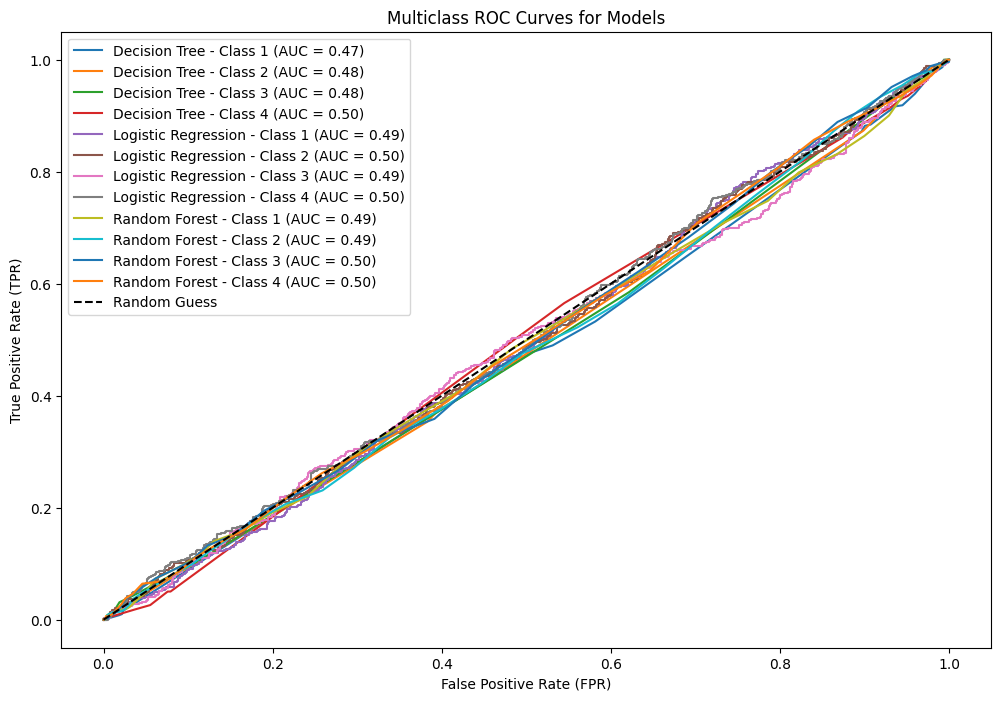

In [ ]:
# Plot ROC curve for each class and model
plt.figure(figsize=(12, 8))

# Decision Tree
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs_dt[:, i])
    auc_dt = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Decision Tree - Class {class_label} (AUC = {auc_dt:.2f})")

# Logistic Regression
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs_lr[:, i])
    auc_lr = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Logistic Regression - Class {class_label} (AUC = {auc_lr:.2f})")

# Random Forest
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs_rf[:, i])
    auc_rf = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Random Forest - Class {class_label} (AUC = {auc_rf:.2f})")

# Random Guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Plot settings
plt.title("Multiclass ROC Curves for Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="best")
plt.show()

In [ ]:
from xgboost import XGBClassifier
import numpy as np

# Adjust target variable to be zero-based
y_train_adjusted = y_train - 1  # Subtract 1 from each target value
y_test_adjusted = y_test - 1    # Do the same for test data

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train_adjusted)

# Evaluate on the test set
accuracy = xgb_model.score(X_test, y_test_adjusted)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.24


In [ ]:
# Relabel target variable
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_adjusted)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Add 1 back to predictions to match original class labels
y_pred_xgb_original = y_pred_xgb + 1

# Evaluate
accuracy = accuracy_score(y_test, y_pred_xgb_original)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred_xgb_original))

XGBoost Accuracy: 0.25
              precision    recall  f1-score   support

           1       0.23      0.22      0.22       492
           2       0.26      0.28      0.27       498
           3       0.25      0.24      0.25       513
           4       0.24      0.25      0.24       497

    accuracy                           0.25      2000
   macro avg       0.25      0.25      0.25      2000
weighted avg       0.25      0.25      0.25      2000



In [ ]:
# Define features and target
X = df_selected.drop(columns=['Stress_Level'])  # Drop the new target from features
y = df_selected['Stress_Level']                # Use Stress_Level as the target
from sklearn.model_selection import train_test_split

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.39
              precision    recall  f1-score   support

           1       0.51      0.36      0.43       718
           2       0.34      0.36      0.35       652
           3       0.36      0.46      0.41       630

    accuracy                           0.39      2000
   macro avg       0.41      0.40      0.39      2000
weighted avg       0.41      0.39      0.40      2000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Trying to predict stress level
# Drop interactions involving the target variable
leaking_features = ['Screen_Stress_Interaction', 'Stress_Sleep_Interaction', 'Work_Stress_Interaction', 'Gaming_Stress_Interaction']
X_stress = df_selected.drop(columns=leaking_features + ['Stress_Level'])  # Drop the target itself
y = df_selected['Stress_Level']
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stress, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust max_depth for better generalization
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.26      0.31       718
           2       0.33      0.65      0.44       652
           3       0.36      0.13      0.20       630

    accuracy                           0.35      2000
   macro avg       0.36      0.35      0.32      2000
weighted avg       0.36      0.35      0.32      2000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_stress, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.33
              precision    recall  f1-score   support

           1       0.36      0.31      0.33       718
           2       0.33      0.37      0.35       652
           3       0.31      0.32      0.31       630

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=500)  # Increase max_iter if convergence issues arise
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.24      0.29       718
           2       0.34      0.36      0.35       652
           3       0.33      0.44      0.38       630

    accuracy                           0.34      2000
   macro avg       0.35      0.35      0.34      2000
weighted avg       0.35      0.34      0.34      2000



##Unsupervised Machine Learning

---



In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Scaling
from sklearn.preprocessing import StandardScaler

# K-Means clustering
from sklearn.cluster import KMeans

# Dimensionality reduction for visualization
from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt

In [ ]:
def run_kmeans_clustering(X, k=3, visualize=True):
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply K-Means
    Kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    # Optional: Visualize clusters using PCA
    if visualize:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        plt.figure(figsize=(10, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
        plt.title(f'K-Means Clustering Results for k={k}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.show()

    # Return the cluster labels
    return cluster_labels

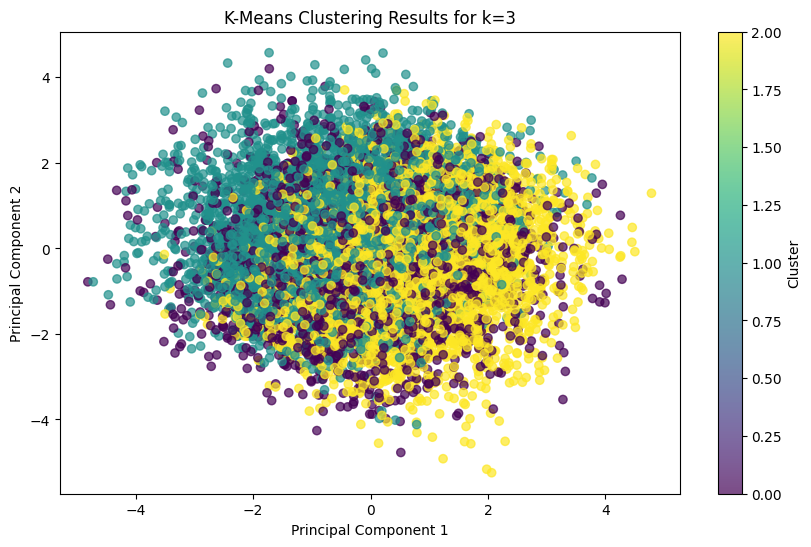

   Age_Category  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0             2                0.030187                  0.876421   
1             2               -1.093244                 -0.606123   
2             5               -1.083777                  0.936933   
3             2               -0.831320                  0.219433   
4             5               -1.664426                 -1.474902   

   Gaming_Hours  Screen_Time_Hours  Mental_Health_Status  Stress_Level  \
0     -1.268838           1.084561                     3             1   
1      0.846355          -0.090482                     1             3   
2     -0.867919          -1.191312                     2             3   
3      0.051430           1.262673                     4             2   
4     -1.538422           1.151353                     3             1   

   Sleep_Hours  Physical_Activity_Hours  Support_Systems_Access  ...  \
0     1.040263                 0.587332                       0  ...

In [ ]:
# Ensure the feature set X is correctly defined (excluding 'Cluster' if already present)
X = df_selected.drop(columns=['Cluster'], errors='ignore')  # Drop 'Cluster' if it exists

# Define the number of clusters
k1 = 3  # Number of clusters

# Run K-Means clustering
cluster_labels_X1 = run_kmeans_clustering(X, k=k1)

# Add cluster labels to the original dataset
df_selected['Cluster'] = cluster_labels_X1

# Check the result
print(df_selected.head())

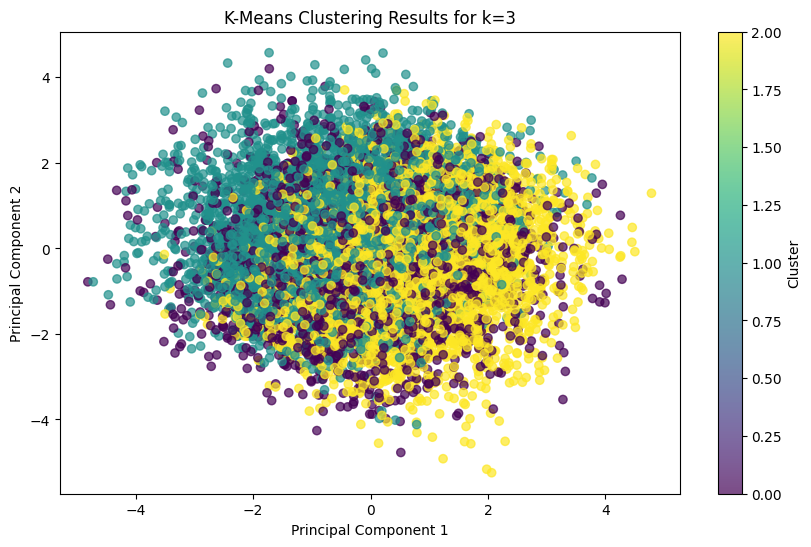

   Age_Category  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0             2                0.030187                  0.876421   
1             2               -1.093244                 -0.606123   
2             5               -1.083777                  0.936933   
3             2               -0.831320                  0.219433   
4             5               -1.664426                 -1.474902   

   Gaming_Hours  Screen_Time_Hours  Mental_Health_Status  Stress_Level  \
0     -1.268838           1.084561                     3             1   
1      0.846355          -0.090482                     1             3   
2     -0.867919          -1.191312                     2             3   
3      0.051430           1.262673                     4             2   
4     -1.538422           1.151353                     3             1   

   Sleep_Hours  Physical_Activity_Hours  Support_Systems_Access  ...  \
0     1.040263                 0.587332                       0  ...

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def run_kmeans_clustering(X, k=3, visualize=True):
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)  # Consistent naming
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    # Optional: Visualize clusters using PCA
    if visualize:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        plt.figure(figsize=(10, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
        plt.title(f'K-Means Clustering Results for k={k}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.show()

    # Return the cluster labels
    return cluster_labels

# Ensure the feature set X is correctly defined (excluding 'Cluster' if already present)
X = df_selected.drop(columns=['Cluster'], errors='ignore')  # Drop 'Cluster' if it exists

# Define the number of clusters
k1 = 3  # Number of clusters

# Run K-Means clustering
cluster_labels_X1 = run_kmeans_clustering(X, k=k1)

# Add cluster labels to the original dataset
df_selected['Cluster'] = cluster_labels_X1

# Check the result
print(df_selected.head())

In [ ]:
cluster_summary = df_selected.groupby('Cluster').mean()
print(cluster_summary)

         Age_Category  Technology_Usage_Hours  Social_Media_Usage_Hours  \
Cluster                                                                   
0            3.847251               -0.006965                 -0.015577   
1            3.847043               -0.043071                  0.009216   
2            3.810963                0.048392                  0.000849   

         Gaming_Hours  Screen_Time_Hours  Mental_Health_Status  Stress_Level  \
Cluster                                                                        
0            0.013433           0.016240              2.486762      2.004481   
1            0.013865          -0.867158              2.513535      2.021551   
2           -0.022923           0.871569              2.510963      1.974599   

         Sleep_Hours  Physical_Activity_Hours  Support_Systems_Access  ...  \
Cluster                                                                ...   
0           0.002727                -0.008385                1.0000

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Check the first 10 components
X_pca = pca.fit_transform(X)
print("Explained variance by components:", pca.explained_variance_ratio_)

Explained variance by components: [0.10642337 0.10459565 0.10202467 0.10085803 0.08665927 0.0856606
 0.06689684 0.06276846 0.053906   0.05377089]


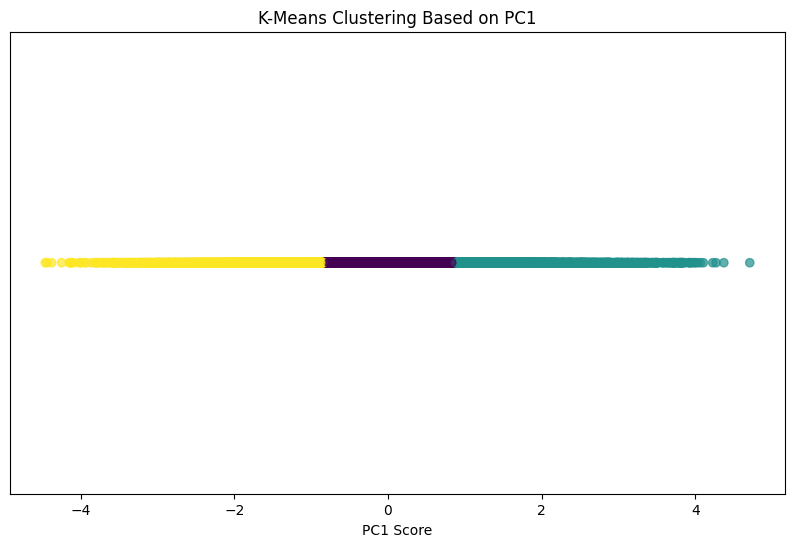

In [ ]:
# Use only PC1 for clustering
X_pc1 = X_pca[:, 0].reshape(-1, 1)

# Apply K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pc1)

# Add cluster labels to the dataset
df_selected['Cluster_PC1'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pc1, [0] * len(X_pc1), c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering Based on PC1')
plt.xlabel('PC1 Score')
plt.yticks([])
plt.show()

In [ ]:
cluster_summary = df_selected.groupby('Cluster_PC1').mean()
print(cluster_summary)

             Age_Category  Technology_Usage_Hours  Social_Media_Usage_Hours  \
Cluster_PC1                                                                   
0                3.719726                0.001959                 -0.001770   
1                4.070029                0.934605                  0.034146   
2                3.780343               -0.903938                 -0.030201   

             Gaming_Hours  Screen_Time_Hours  Mental_Health_Status  \
Cluster_PC1                                                          
0                0.012320           0.003875              2.495325   
1                0.356631           0.479231              2.514151   
2               -0.362678          -0.467909              2.514516   

             Stress_Level  Sleep_Hours  Physical_Activity_Hours  \
Cluster_PC1                                                       
0                1.961003    -0.029499                -0.007981   
1                2.001089    -0.495083              

In [ ]:
cluster_summary = df_selected.groupby('Cluster').mean()
print(cluster_summary)

               Age  Age_Category  Technology_Usage_Hours  \
Cluster                                                    
0        40.919966      3.780758               -0.005619   
1        53.017316      4.857143               -0.934782   
2        31.360252      2.928159               -0.089733   
3        52.658120      4.828054                0.990751   
4        29.652858      2.775039               -0.030837   

         Social_Media_Usage_Hours  Gaming_Hours  Screen_Time_Hours  \
Cluster                                                              
0                       -0.015089      0.008163           0.016894   
1                       -0.040182      0.082341          -0.115623   
2                        0.006753     -1.021801          -0.009535   
3                        0.047941      0.028291           0.083244   
4                        0.000769      0.902445           0.013947   

         Mental_Health_Status  Stress_Level  Sleep_Hours  \
Cluster                     

In [ ]:
cluster_summary = df_selected.groupby('Cluster').mean()
print(cluster_summary)

               Age  Age_Category  Technology_Usage_Hours  \
Cluster                                                    
0        26.848565      2.526732               -0.072382   
1        50.903520      4.670469               -0.871716   
2        50.102073      4.597448                0.940753   

         Social_Media_Usage_Hours  Gaming_Hours  Screen_Time_Hours  \
Cluster                                                              
0                       -0.022081     -0.005175          -0.037535   
1                       -0.010844     -0.038776          -0.016944   
2                        0.037356      0.044215           0.062043   

         Mental_Health_Status  Stress_Level  Sleep_Hours  \
Cluster                                                    
0                    2.503029      2.003160     0.033252   
1                    2.487940      2.012712     0.013670   
2                    2.527273      1.983094    -0.053651   

         Physical_Activity_Hours  ...  Work_Env

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering in Original Feature Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

NameError: name 'cluster_labels' is not defined

<Figure size 1000x600 with 0 Axes>

## Results and Insights